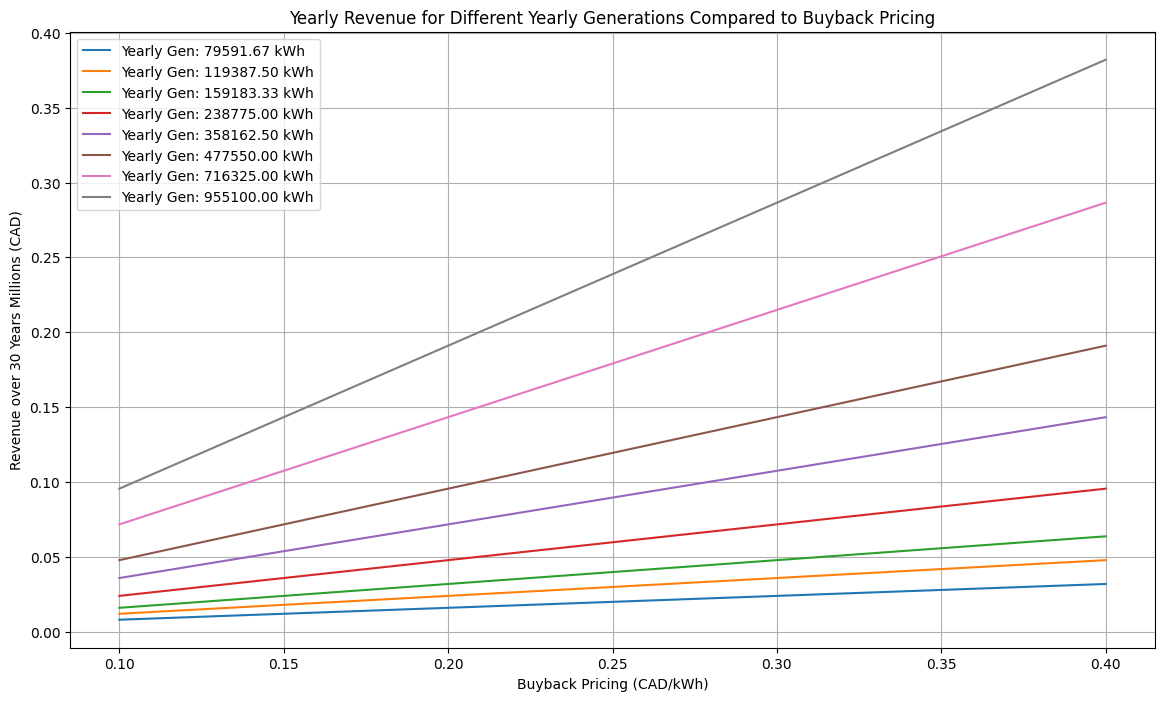

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Constants
system_capacity = 190 #kW
yearly_generation = 238775 #kWh
solar_mount= 'roof'
# array of 3 fractions of yearly generation and 3 multiples 

projLife = 30 # project lifespan in years
costSol = 450 # approximate $/kW per CANSOLAR

costRoof = 410 # approximate $/kW per Hayter Group
costCarport = 1.57 * 1000 # approximate $/kW per Hayter Group
    
bat_cost = 2883732.34 # cost of Tesla Megapack in CAD
trans_cost = 388416.66 # https://www.larsonelectronics.com/product/282374/5-mva-pad-mount-transformer-480v-delta-primary-21600y-12470-grounded-wye-secondary-knan-bell-green?utm_campaign=20417422929&utm_source=google&utm_medium=cpc&utm_content=&keyword=&adgroupid=&gad_source=1&gclid=Cj0KCQiAxOauBhCaARIsAEbUSQTmYmdHeF33ObE_SgbDpLif5siC51MRq3I2RXI3Mlt_F6e2AvHPcPkaAg3wEALw_wcB


if solar_mount == 'roof':
    cost_mount = costRoof
else:
    cost_mount = costCarport



buybackpricing = [0.1,0.13,0.16,0.19,0.22,0.25,0.28,0.31,0.34,0.37,0.4] # range of buyback pricing from 10 c/kWh to 40 c/kWh


projLife = 30 # years
generation_array = np.array([1/3, 1/2, 2/3, 1, 1.5, 2, 3, 4]) * yearly_generation
buyback_pricing = np.array([0.1, 0.13, 0.16, 0.19, 0.22, 0.25, 0.28, 0.31, 0.34, 0.37, 0.4])

# Calculate revenues for each buyback price and generation value over the project lifespan
yearly_revenue = np.outer(generation_array, buyback_pricing)
upfront_cost = cost_mount*(system_capacity+costSol)+trans_cost

# Plotting
plt.figure(figsize=(14, 8))

# Loop through each generation scenario and plot the revenue curve
for i, gen in enumerate(generation_array):
    plt.plot(buyback_pricing, yearly_revenue[i]/1000000, label=f'Yearly Gen: {generation_array[i]:.2f} kWh')

plt.title('Yearly Revenue for Different Yearly Generations Compared to Buyback Pricing')
plt.xlabel('Buyback Pricing (CAD/kWh)')
plt.ylabel('Revenue over 30 Years Millions (CAD)')
plt.legend()
plt.grid(True)
plt.show()


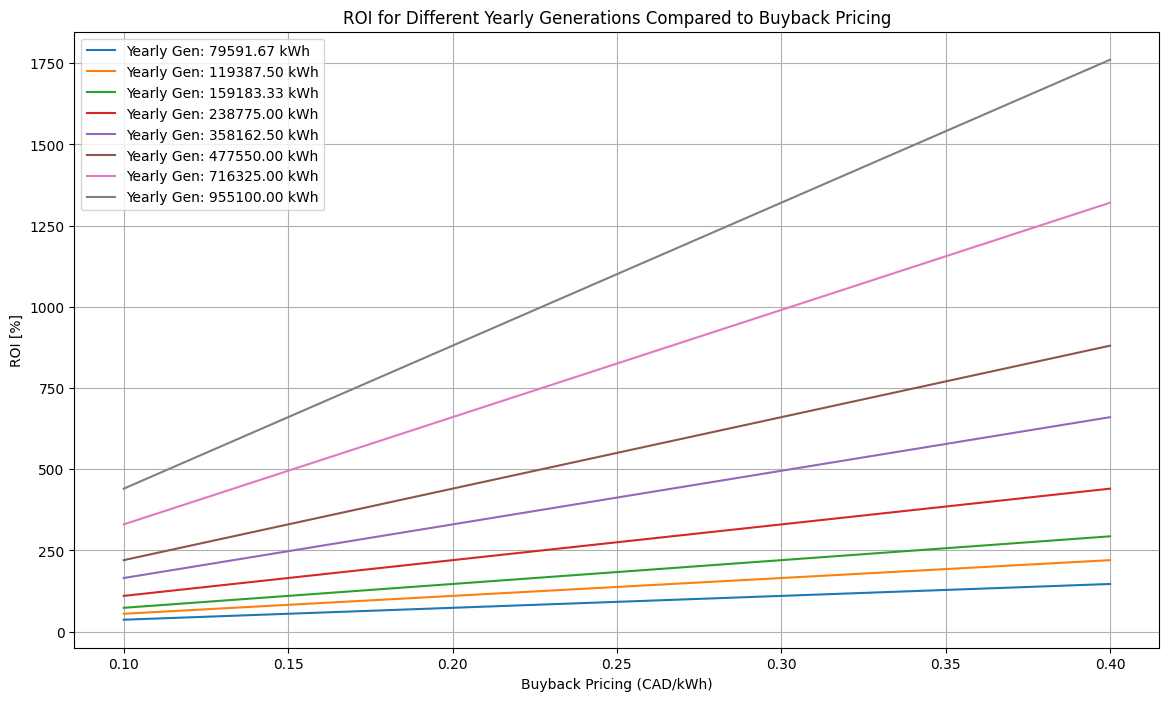

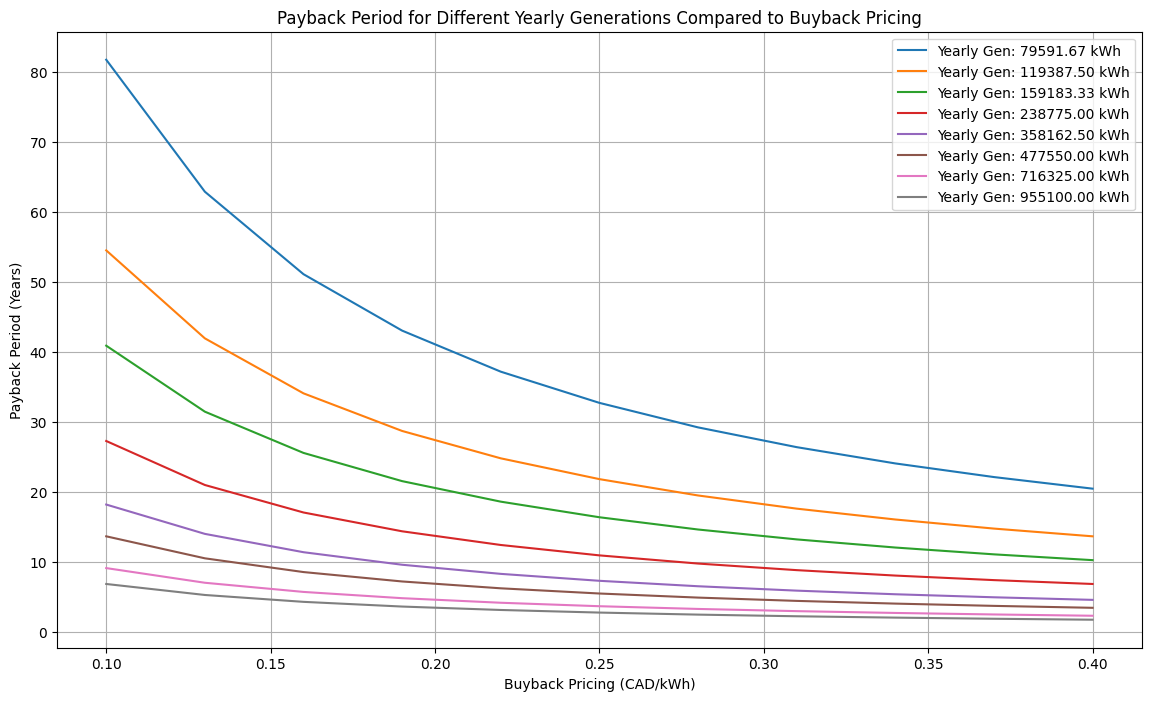

In [17]:
# Given upfront cost calculated previously
upfront_cost = cost_mount * (system_capacity + costSol) + trans_cost

# Calculate ROI for each generation and buyback pricing
roi = yearly_revenue*projLife / upfront_cost *100

# Calculate Payback Period
payback_period = upfront_cost / (yearly_revenue) # Days to payback

# Plot ROI vs buyback pricing
plt.figure(figsize=(14, 8))

# Loop through each generation scenario and plot the ROI curve
for i, gen in enumerate(generation_array):
    plt.plot(buyback_pricing, roi[i], label=f'Yearly Gen: {generation_array[i]:.2f} kWh')

plt.title('ROI for Different Yearly Generations Compared to Buyback Pricing')
plt.xlabel('Buyback Pricing (CAD/kWh)')
plt.ylabel('ROI [%]')
plt.legend()
plt.grid(True)
plt.show()

# Plot Payback Period vs buyback pricing
plt.figure(figsize=(14, 8))

# Loop through each generation scenario and plot the Payback Period curve
for i, gen in enumerate(generation_array):
    plt.plot(buyback_pricing, payback_period[i], label=f'Yearly Gen: {generation_array[i]:.2f} kWh')

plt.title('Payback Period for Different Yearly Generations Compared to Buyback Pricing')
plt.xlabel('Buyback Pricing (CAD/kWh)')
plt.ylabel('Payback Period (Years)')
plt.legend()
plt.grid(True)
plt.show()


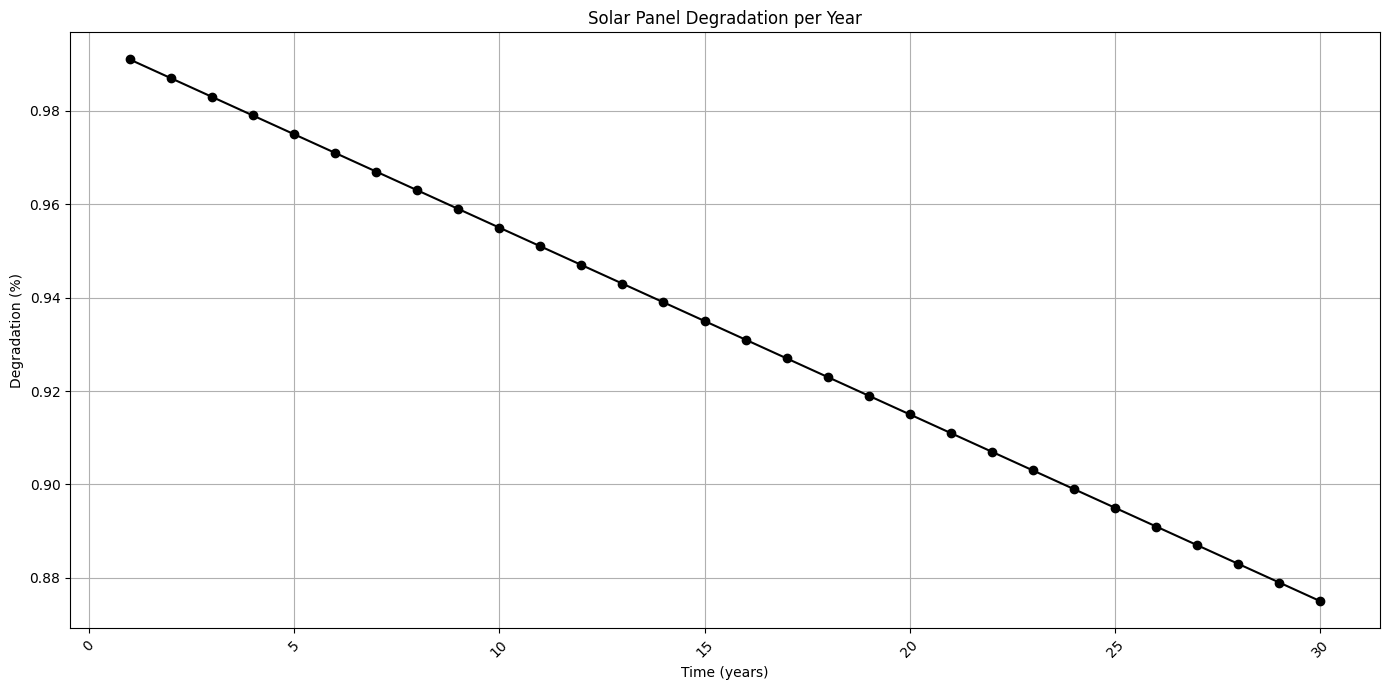

In [10]:
years = np.arange(1,31) # Lifespan of the project

degradation = (-0.4*years+99.5)/100
#Plot of the payback period in years for each configuration
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('Solar Panel Degradation per Year')
plt.xlabel('Time (years)')
plt.ylabel('Degradation (%)')
plt.xticks(rotation=45)
plt.grid(True)    

ax1.plot(years, degradation, marker='o', linestyle='-', color='k', label='Panel Degradation per Year')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

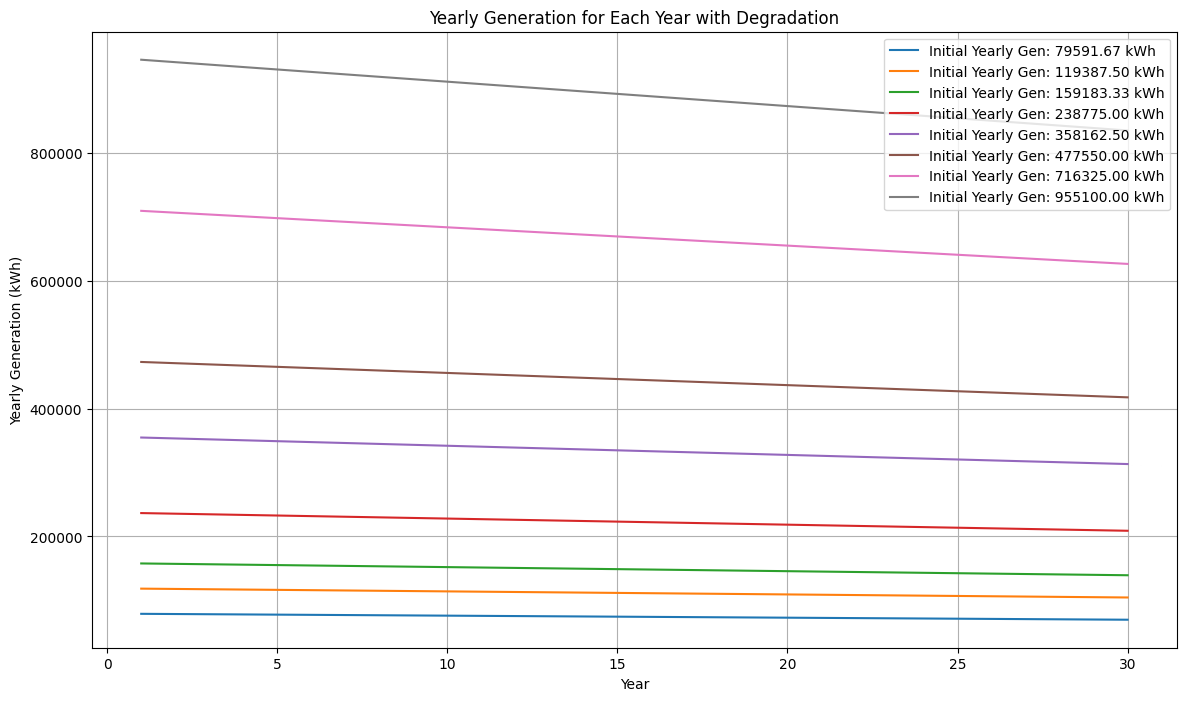

In [18]:

generation_yearly_with_deg = np.ones((len(generation_array), projLife))
generation_yearly_with_deg = generation_yearly_with_deg*degradation

for i in range(len(generation_array)):
    generation_yearly_with_deg[i]= generation_yearly_with_deg[i]*generation_array[i]


# Plotting
plt.figure(figsize=(14, 8))

for i, gen in enumerate(generation_array):
    plt.plot(years, generation_yearly_with_deg[i, :], label=f'Initial Yearly Gen: {generation_array[i]:.2f} kWh')

plt.title('Yearly Generation for Each Year with Degradation')
plt.xlabel('Year')
plt.ylabel('Yearly Generation (kWh)')
plt.legend()
plt.grid(True)
plt.show()


old yearly generation:  [ 79591.66666667 119387.5        159183.33333333 238775.
 358162.5        477550.         716325.         955100.        ]

 new avg generation:  [ 74259.025  111388.5375 148518.05   222777.075  334165.6125 445554.15
 668331.225  891108.3   ]


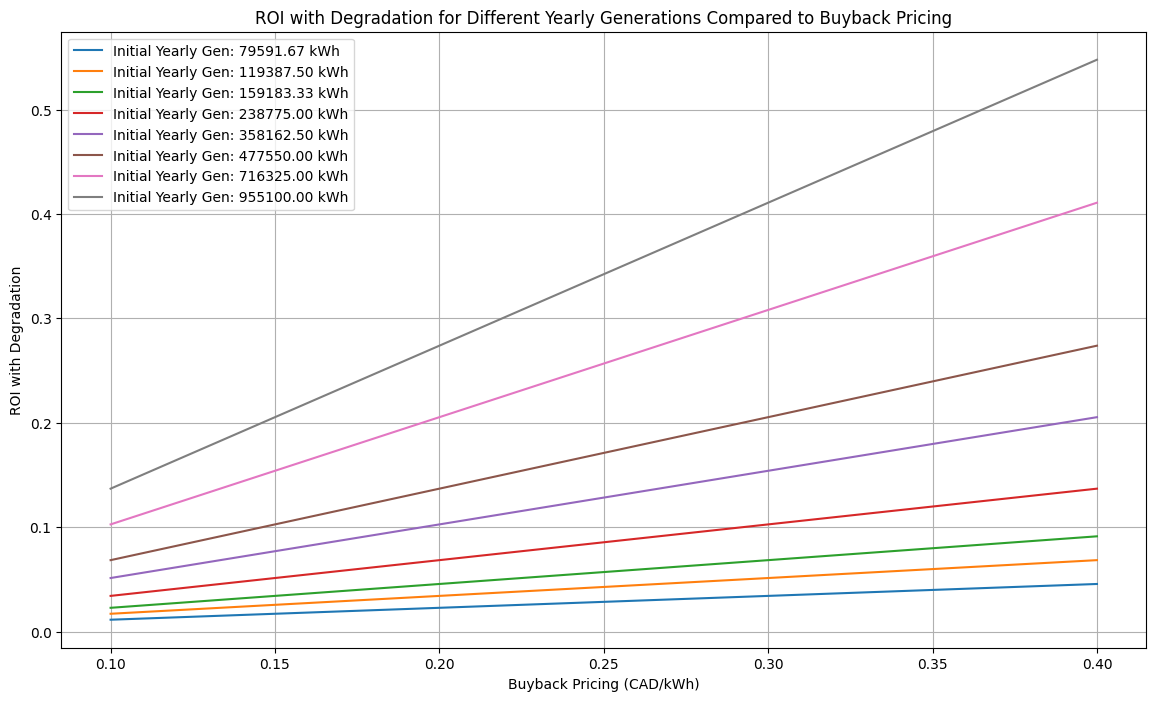

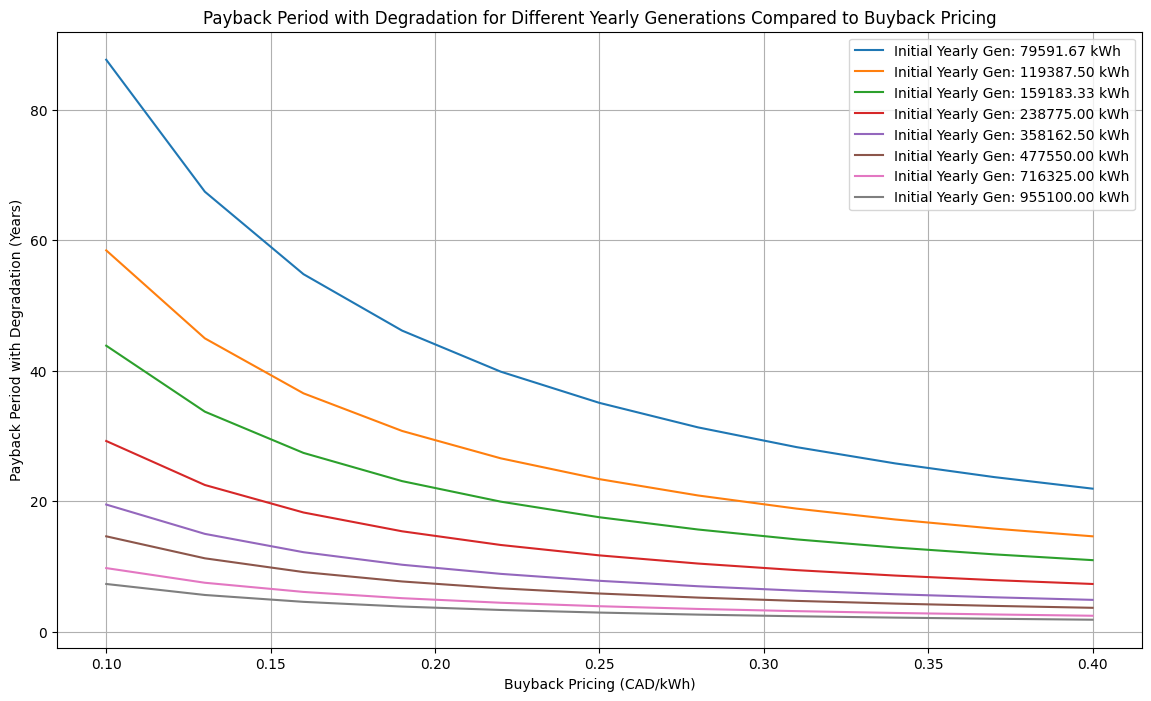

In [26]:
# Updated calculation for total generation with degradation over the lifespan for each system
total_generation_with_deg = np.sum(generation_yearly_with_deg, axis=1)  # Sum across each row for total generation over years
print('old yearly generation: ', generation_array)
print('\n new avg generation: ', generation_yearly_with_deg.mean(axis=1))

# New revenue calculation with updated total generation
yearly_revenue_with_deg = np.outer(generation_yearly_with_deg.mean(axis=1), buyback_pricing)  # Total revenue for each buyback pricing and system

# Calculate new ROI with updated revenue
roi_with_deg = yearly_revenue_with_deg / upfront_cost

# Calculate new Payback Period with updated revenue
# Assuming constant yearly revenue for simplicity
payback_period_with_deg = upfront_cost / yearly_revenue_with_deg

# Plotting new ROI vs buyback pricing
plt.figure(figsize=(14, 8))
for i, gen in enumerate(generation_array):
    plt.plot(buyback_pricing, roi_with_deg[i], label=f'Initial Yearly Gen: {generation_array[i]:.2f} kWh')

plt.title('ROI with Degradation for Different Yearly Generations Compared to Buyback Pricing')
plt.xlabel('Buyback Pricing (CAD/kWh)')
plt.ylabel('ROI with Degradation')
plt.legend()
plt.grid(True)
plt.show()

# Plotting new Payback Period vs buyback pricing
plt.figure(figsize=(14, 8))
for i, gen in enumerate(generation_array):
    plt.plot(buyback_pricing, payback_period_with_deg[i], label=f'Initial Yearly Gen: {generation_array[i]:.2f} kWh')

plt.title('Payback Period with Degradation for Different Yearly Generations Compared to Buyback Pricing')
plt.xlabel('Buyback Pricing (CAD/kWh)')
plt.ylabel('Payback Period with Degradation (Years)')
plt.legend()
plt.grid(True)
plt.show()
